In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [36]:
# Step 1
def abs_diff(img1, img2):
    """
    Calculate sum of absolute difference between two equal sized images
    """
    return np.sum(np.abs(img1 - img2))

In [39]:
# Step 2
# Load images
img0 = np.array(cv2.imread("nose_left.png")[...,0]).astype(np.int8)
img1 = np.array(cv2.imread("nose1.png")[...,0]).astype(np.int8)
img2 = np.array(cv2.imread("nose2.png")[...,0]).astype(np.int8)
img3 = np.array(cv2.imread("nose3.png")[...,0]).astype(np.int8)

# Calculate absolute differences
abs_diffs = [abs_diff(img0, img1), abs_diff(img0, img2), abs_diff(img0, img3)]
abs_diffs # nose3 is the best match
# print(np.abs(img0-img2))
# print(img0, "\n", img2)


[1329, 119, 1490]

In [38]:
# Step 3
# Load images
span_img = cv2.imread("nose_span.png")[...,0]
# print(span_img[0])
def find_best_match(img, span_img):
    '''Loops through a horizontal image, span_img of n*m dimension,
    and compares it with img, of dimension n*n. 
    Returns the best match, and the index of the best match.
    input:
        img: n*n np.array
        span_img: n*m np.array

    return:
        best_match: n*n np.array
        best_match_index: int
    '''
    best_match = None
    best_match_index = None
    for i in range(len(span_img[0])-len(img[0])):
        # Calculate absolute difference between img and span_img
        curr_abs_diff = abs_diff(img, span_img[:,i:i+len(img[0])])
        # If best match is None or abs_diff is less than best match,
        # set best match to abs_diff and best match index to i
        if best_match is None or curr_abs_diff < best_match:
            best_match = curr_abs_diff
            best_match_index = i
    return best_match, best_match_index

print(find_best_match(img0, span_img))

ValueError: operands could not be broadcast together with shapes (7,7,3) (7,7) 

In [ ]:
# Step 4
# Template matching
def template_matching(left_img, right_img):
    '''
    input:
        left_img: n*m np.array
        right_img: n*m np.array

    return:
        left_img_best_match: n*m np.array
        right_img_best_match: n*m np.array
        '''
    # iterate through each row in the right image, 
    # and find the best match for each template in the left image
    n = len(left_img)    # n = number of rows in left image
    m = len(left_img[0]) # m = number of columns in left image

    curr_abs_diff = None
    curr_best_match_index = None

    kernel_size = 7 
    nrows = np.floor(n/kernel_size).astype(int) # numer of kernels that fit vertically in the left image
    best_match = np.zeros((n, m)) # array of disparities
    
    for row_i in tqdm(range(n-kernel_size)):
        span_i = right_img[row_i:row_i+kernel_size] #[row_i*kernel_size:row_i*kernel_size+kernel_size]

        # print(span_i)
        for column_j in range(m-kernel_size):
            curr_template = left_img[row_i:row_i+kernel_size, column_j:column_j+kernel_size] #[row_i*kernel_size:row_i*kernel_size+kernel_size, template_j:template_j+kernel_size]
            # print(curr_template)
            
            
            best_match[row_i,column_j], _ = find_best_match(curr_template, span_i)
            
            # if best_match[row_i][0] == 0 or curr_best_match < best_match:
            #     best_match = curr_abs_diff

    return best_match

tsukuba_left = cv2.imread("tsukuba_left.png")[...,0]
tsukuba_right = cv2.imread("tsukuba_right.png")[...,0]
# print(tsukuba_left)
test = template_matching(tsukuba_left, tsukuba_right)

100%|██████████| 281/281 [08:18<00:00,  1.77s/it]


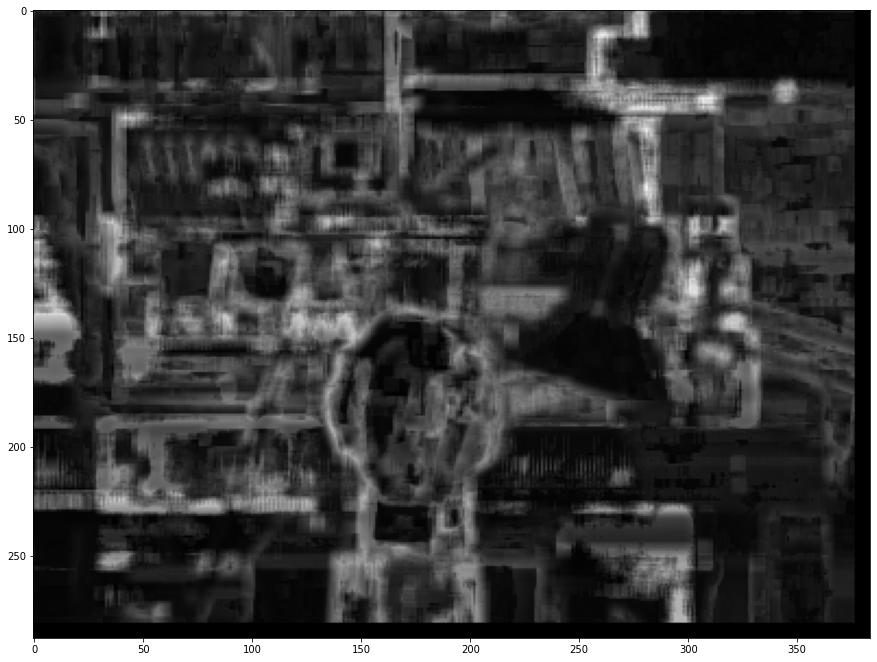

In [44]:
plt.figure(figsize = (15,15))
# show test image with inverted colors
plt.imshow(test, cmap='gray')